In [ ]:
!pip list

In [ ]:
# one-hot encoding (Sklearn)
# 1 0 0
# 0 1 0
# 1 0 0
# 0 0 1
# 0 1 0 
# 0 0 1
from sklearn.preprocessing import OneHotEncoder
import numpy as np
data = np.array([0, 1, 0, 2, 1, 2]).reshape(-1, 1)
print(data)
ohe = OneHotEncoder()
ohe.fit_transform(data).toarray().astype('int')

In [ ]:
# 這是 Keras 用法
from keras.utils import np_utils
np_utils.to_categorical(data).astype('int')

In [ ]:
import keras
keras.__version__

'2.6.0'

In [ ]:
# 套件有範例數據
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train[:2].shape

(2, 28, 28)

In [ ]:
X_train[:1].shape

(1, 28, 28)

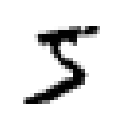

In [ ]:
# 請畫出第一張圖片
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(X_train[0, :, :], cmap='gray_r')
plt.axis('off')
plt.show()

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

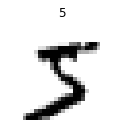

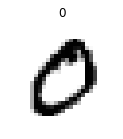

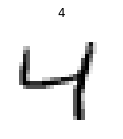

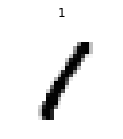

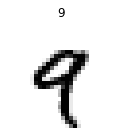

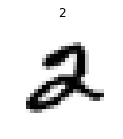

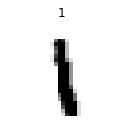

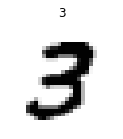

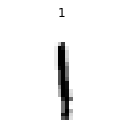

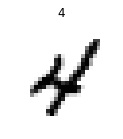

In [ ]:
# 請畫出十張圖片 (前面十筆數據)

import matplotlib.pyplot as plt
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.title(str(y_train[i]))
    plt.imshow(X_train[i, :, :], cmap='gray_r')
    plt.axis('off')
    plt.show()

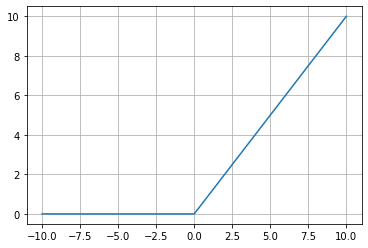

In [ ]:
# 解釋 relu activation function
# max(0, x)
def myrelu(x):
    return( max(0, x))

import matplotlib.pyplot as plt
import numpy as np
X = range(-10, 11, 1)
y = [myrelu(x) for x in X]

plt.plot(X, y)
plt.grid()
plt.show()

In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation #神經層
from keras.utils import np_utils           # 用來後續將 label 標籤轉為 one-hot-encoding  
import matplotlib.pyplot as plt
import os

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=28*28, 
                kernel_initializer='normal', activation='relu'))             # input + hidder layer
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))  # hidder layer
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))  # hidder layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))# Add output layer

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# DL需要one-hot encoding 格式顯示LABLE數據
y_TestOneHot = np_utils.to_categorical(y_test) 
y_TestOneHot[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape[0]

60000

In [ ]:

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(X_train.shape[0], 28*28).astype('float32')  # 自己試試看float64
X_test_2D = X_test.reshape(X_test.shape[0], 28*28).astype('float32')  

x_Train_norm = X_train_2D/255 # 將訊號 0- 255 轉換成 0-1
x_Test_norm = X_test_2D/255

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=10, 
                          batch_size=800, 
                          verbose=2)  

print('Done!!')

Epoch 1/10
60/60 - 1s - loss: 0.0150 - accuracy: 0.9967 - val_loss: 0.1009 - val_accuracy: 0.9758
Epoch 2/10
60/60 - 1s - loss: 0.0123 - accuracy: 0.9977 - val_loss: 0.1040 - val_accuracy: 0.9741
Epoch 3/10
60/60 - 1s - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.1070 - val_accuracy: 0.9743
Epoch 4/10
60/60 - 1s - loss: 0.0093 - accuracy: 0.9984 - val_loss: 0.1061 - val_accuracy: 0.9746
Epoch 5/10
60/60 - 1s - loss: 0.0076 - accuracy: 0.9986 - val_loss: 0.1077 - val_accuracy: 0.9746
Epoch 6/10
60/60 - 1s - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.1091 - val_accuracy: 0.9749
Epoch 7/10
60/60 - 1s - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.1140 - val_accuracy: 0.9743
Epoch 8/10
60/60 - 1s - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.1093 - val_accuracy: 0.9753
Epoch 9/10
60/60 - 3s - loss: 0.0043 - accuracy: 0.9996 - val_loss: 0.1139 - val_accuracy: 0.9755
Epoch 10/10
60/60 - 2s - loss: 0.0034 - accuracy: 0.9996 - val_loss: 0.1194 - val_accuracy: 0.9744


In [ ]:

# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 4s 13ms/step - loss: 0.0998 - accuracy: 0.9766

	[Info] Accuracy of testing data = 97.7%


In [ ]:
# 預測(prediction)
import numpy as np
X = x_Test_norm
predictions = np.argmax(model.predict(X), axis=1)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])


prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


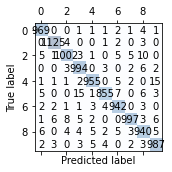

config =  {'name': 'sequential_8', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_25_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense_25', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_26', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config':

In [ ]:

# 模型結構存檔
from keras.models import model_from_json
json_string = model.to_json()
with open("model.config", "w") as text_file:
    text_file.write(json_string)


    
# 模型訓練結果存檔
model.save_weights("model.weight")

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=predictions)

# draw confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()



# 取得模型組態
print("config = ", model.get_config())
# 取得模型所有權重
print("weights = ", model.get_weights())
# 取得模型彙總資訊
print("summary = ", model.summary())
# 取得網路層資訊
print("layer = ", model.get_layer(index=1).name)
# 取得參數總數
print("params = ", model.count_params())

#from keras.utils import plot_model
#plot_model(model, to_file='model.png')
